## Plot number of novel verb-particle constructions per decade

In [1]:

def load_vpc_to_year(data_path="vpc_corpus.csv"):
    vpc_to_year = {}
    with open(data_path, "r") as f: 
        for line in f:
            line = line.split() 
            curr_vpc = (line[0], line[1])
            first_occurrence = int(line[3])
            vpc_to_year[curr_vpc] = first_occurrence
    return vpc_to_year


def load_vpc_to_frequency(data_path="vpc_corpus.csv"):
    vpc_to_freq = {}
    with open(data_path, "r") as f: 
        for line in f:
            line = line.split() 
            curr_vpc = (line[0], line[1])
            frequency = int(line[2])
            vpc_to_freq[curr_vpc] = frequency
    return vpc_to_freq

            
vpc_to_year = load_vpc_to_year()
vpc_to_freq = load_vpc_to_frequency()

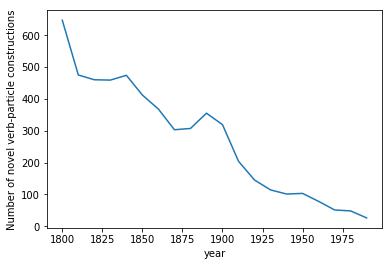

In [17]:


def plot_by_year(vpc_to_year):
    year_counter = Counter(list(vpc_to_year.values()))
    years = list(range(1800, 2000, 10))
    occurrences = [year_counter[year] for year in years]
    plt.plot(years, occurrences)
    
    plt.xlabel("year")
    plt.ylabel("Number of novel verb-particle constructions")


plot_by_year(vpc_to_year)

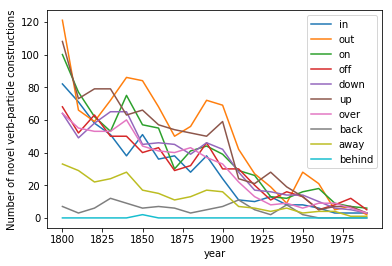

In [14]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt


def plot_by_particle(vpc_to_year):
    particle_to_year = defaultdict(Counter)
    for (curr_v, curr_p), curr_year in vpc_to_year.items():
        particle_to_year[curr_p].update([curr_year])
        
    years = list(range(1800, 2000, 10))
    for particle, year_counter in particle_to_year.items():
        occurrences = [year_counter[year] for year in years]
        plt.plot(years, occurrences, label=particle)
        
    plt.xlabel("year")
    plt.ylabel("Number of novel verb-particle constructions")
    plt.legend()
            
    
plot_by_particle(vpc_to_year)

## Examine novel verb-particle constructions per decade

In [15]:
import random


def get_vpcs_by_decade(
        vpc_to_year, vpc_to_freq, decade, random_shuffle=False, n_samples=10):
    vpc_freqs = [(vpc, freq) for vpc, freq in vpc_to_freq.items()
                 if vpc_to_year[vpc] == decade]
    if random_shuffle:
        random.shuffle(vpc_freqs)
    else:
        vpc_freqs = sorted(vpc_freqs, key=lambda x: x[1], reverse=True)
    result = [" ".join(item[0]) for item in vpc_freqs]
    return result[:n_samples]

In [40]:
# Most frequent VPCs per decade

for decade in range(1800, 2000, 10):
    print(decade, ", ".join(get_vpcs_by_decade(vpc_to_year, vpc_to_freq, decade)))

1800 back up, sort out, shut down, show off, straighten out, act out, see off, leave over, pin down, straighten up
1810 spell out, line up, heat up, sign up, start over, knock over, climb out, flatten out, wait out, step down
1820 wash up, end up, split up, face up, focus on, level off, loosen up, drift off, mop up, sign on
1830 calm down, cancel out, top off, reach up, smooth out, hand back, ask out, finish up, flare up, tip over
1840 rule out, track down, switch off, catch on, doze off, crop up, win out, climb down, blurt out, crack up
1850 check out, head out, pop up, tighten up, head on, settle out, bog down, rest up, water down, chew up
1860 mess up, join up, black out, touch down, seal off, start down, sober up, dream up, ease up, palm down
1870 contract out, palm up, size up, slow up, nod off, log out, balance out, soften up, chew on, peter out
1880 switch on, trail off, peek out, chill out, link up, bump off, liven up, hunch up, palm out, plug in
1890 piss off, log on, phase ou

In [16]:
# Random frequent VPCs per decade

for decade in range(1800, 2000, 10):
    print(decade, ", ".join(get_vpcs_by_decade(vpc_to_year, vpc_to_freq, decade, random_shuffle=True)))

1800 shoot up, curse on, ramble up, drink down, swing off, shrink down, thaw out, spit up, sponge up, rust out
1810 stamp on, trace on, cry off, nod on, lift in, suck up, clap down, shame on, liveth in, thou away
1820 fight down, pant out, locate on, stop in, tour out, tread up, scurry off, skim over, stir on, entice down
1830 lay back, spill over, post out, chat over, sling up, cripple up, loom up, pound down, siphon off, double over
1840 crystallize out, crack up, behave in, seek over, mark up, immerse in, die over, discover in, pole up, recover on
1850 guide out, empty on, steam in, part over, crystalliz out, rock up, stroll over, half off, furrow out, ship up
1860 happen off, suffer out, stare up, chuck out, jut up, splash out, slouch out, drip in, climb in, plod off
1870 chew on, thicken out, grass over, guide up, trot over, jolt up, grade down, select on, size up, crush in
1880 plug in, sulk out, consult in, full up, tear over, hum over, chip in, flag out, act down, shoo off
1890

## Look at which verbs occur with the most particles

In [5]:
from collections import defaultdict


def get_verbs_with_most_particles(vpc_to_year):
    verb_to_n_particles = defaultdict(int)
    for verb, particle in vpc_to_year:
        verb_to_n_particles[verb] += 1
    v_prt_count = [
        (verb, prt_count) for verb, prt_count in verb_to_n_particles.items()]
    v_prt_count = sorted(v_prt_count, reverse=True, key=lambda x: x[1])
    return v_prt_count

    
v_prt_count = get_verbs_with_most_particles(vpc_to_year)

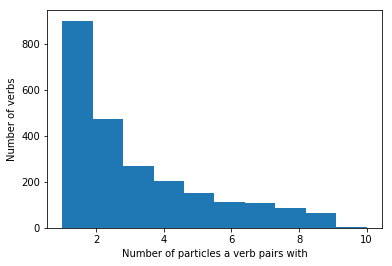

In [12]:
import matplotlib.pyplot as plt

plt.hist([item[1] for item in v_prt_count])
plt.xlabel("Number of particles a verb pairs with")
plt.ylabel("Number of verbs")
plt.show()

In [6]:
print(v_prt_count)

[('leave', 10), ('lie', 10), ('beat', 9), ('break', 9), ('bring', 9), ('call', 9), ('carry', 9), ('cast', 9), ('come', 9), ('cut', 9), ('do', 9), ('drag', 9), ('draw', 9), ('drive', 9), ('drop', 9), ('fall', 9), ('fight', 9), ('force', 9), ('find', 9), ('git', 9), ('give', 9), ('get', 9), ('have', 9), ('hold', 9), ('keep', 9), ('kick', 9), ('knock', 9), ('lay', 9), ('lead', 9), ('look', 9), ('make', 9), ('move', 9), ('pass', 9), ('pay', 9), ('play', 9), ('pull', 9), ('push', 9), ('put', 9), ('read', 9), ('roll', 9), ('send', 9), ('set', 9), ('ship', 9), ('shove', 9), ('show', 9), ('sell', 9), ('slip', 9), ('spring', 9), ('stagger', 9), ('stay', 9), ('start', 9), ('stand', 9), ('steal', 9), ('strike', 9), ('swim', 9), ('swing', 9), ('talk', 9), ('throw', 9), ('take', 9), ('tell', 9), ('turn', 9), ('go', 9), ('wave', 9), ('be', 9), ('work', 9), ('write', 9), ('ask', 8), ('blow', 8), ('bear', 8), ('bind', 8), ('boil', 8), ('brush', 8), ('burn', 8), ('change', 8), ('conduct', 8), ('crawl',